## Step 1: Importing Libraries and Data



In [112]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Importing lead dataset
df = pd.read_csv("/Users/fauziya/Documents/Lead_Scoring/Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

## Step 2 : Data Inspection

In [5]:
# checking the shape of the data 
df.shape

# The dataframe has 9240 rows and 37 columns

(9240, 37)

In [6]:
# Describing data ie # Checking summary of all numerical columns to understand the dataset

df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Check for duplicate rows

print(df.duplicated().sum())

# There are no duplicates in the dataframe.

0


In [13]:
# checking non null count and datatype of the variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
# There are few columns with high number of missing/null values in the dataframe. 

## Step 3: Data Cleaning

In [ ]:
#There are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. 
#So we can convert these values to null values.
 

### 3.1: 'Select' values 

In [8]:
# Converting 'Select' values to NaN.
df_leads = df.replace('Select', np.nan)

In [11]:
# Checking if all 'Select' values have been handled in the columns
select_value_columns = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(select_value_columns)
# there are no 'Select' values in the dataframe df_leads now.

[]


### 3.2: Handling Missing Values

In [9]:
# checking the columns for null values
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### 3.2.1 : Drop Columns with more than 40% Null Values

We see that for some columns we have high percentage of missing values. 
We can drop the columns with missing values greater than 40% .

In [48]:
# Calculating Missing Values Percentage

100*(df_leads.isna().mean()).sort_values(ascending=False)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [20]:
# user defined function to drop columns and know the shape before and after dropping

def dropNullColumns(data ,percentage=40):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",data.shape)

In [21]:
# dropping columns using UDF
dropNullColumns(df_leads)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [22]:
# Checking the percentage of null values for remaining columns

100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### 3.2.2 : Columns with Categorical Data



In [23]:
#check the count of values in each categorical column and 
#then decide how to treat the missing values for that particular column


In [26]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

In [ ]:
#Dropping the following columns

#1. City:
    #City has 39.7 % missing values. 
    #Imputing missing values with Mumbai will make the data more skewed.Hence City column can be dropped.
#2. Tags:
    #Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. 
    #Since this is current status, this column will not be useful for modeling. 
    #Hence it can be dropped.
#3. Country :
    #X Education sells online courses and appx 96% of the customers are from India.
    #Does not make business sense right now to impute missing values with India. 
    #Hence `Country column can be dropped.

#4. What matters most to you in choosing a course:
    #This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. 
    #This is massively skewed and will not provide any insight.

In [27]:
# Dropping Columns
print("Before Drop",df_leads.shape)
df_leads.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",df_leads.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


In [ ]:
#Imputing the following columns

#1. Specialization:
Specialization has 36.58 % missing values. The specialization selected is evenly distributed. 
Hence imputation or dropping is not a good choice.
We need to create additional category called 'Others'.

#2. Lead Source:
"Google" is having highest number of occurences and overall nulls in this column is just 0.39%,
hence we will impute the missing values with label 'Google'


#3. Last Activity:
"Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, 
hence we will impute the missing values with label 'Email Opened'.

#4. What is your current occupation:
We can impute the missing values with 'Unemployed' as it has the most values. 
This seems to be a important variable from business context, since X Education sells online courses
and unemployed people might take this course to increase their chances of getting employed.

In [28]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [29]:
# Re Checking the percentage of null values for remaining columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

#### 3.2.3 : Columns with Numerical Data

In [30]:
# TotalVisits
print("TotalVisits - Value Counts")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [31]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [32]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [33]:
# Page Views Per Visit missing values to be imputed with mode

df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

In [34]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

In [35]:
#Now we don't have any missing value in the dataset.

### 3.3 : Removing Unwanted Columns

#### 3.3.1 : Handling columns with only one unique value

In [41]:
df_leads.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine  ...  \
count                             9240   9240     9240  ...   
unique                               6      2        1  ...   
top                         Unemployed     No       No  ...   
freq                              8290   9226     9240  ...   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407  

[4 rows x 21 columns]

In [ ]:
5 columns have only one unique value.They can be dropped since they have only one category of response from customer which is of no use. 

'Magazine',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque'


In [43]:
# List of columns with one unique value whose count and frequency are same
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                'Update me on Supply Chain Content',
                'Get updates on DM Content',
                'I agree to pay the amount through cheque']
# we will drop these columns
print("Before Dropping Columns",df_leads.shape)
df_leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


#### 3.3.2 : Dropping columns of no use for modeling

In [ ]:
NOTE: Columns such as:

'Prospect ID',
'Lead Number',
'Last Notable Activity'
Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [44]:
# Dropping Columns
print("Before Dropping Columns",df_leads.shape)
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


### 3.4 : Checking & Dropping Category Columns that are Skewed

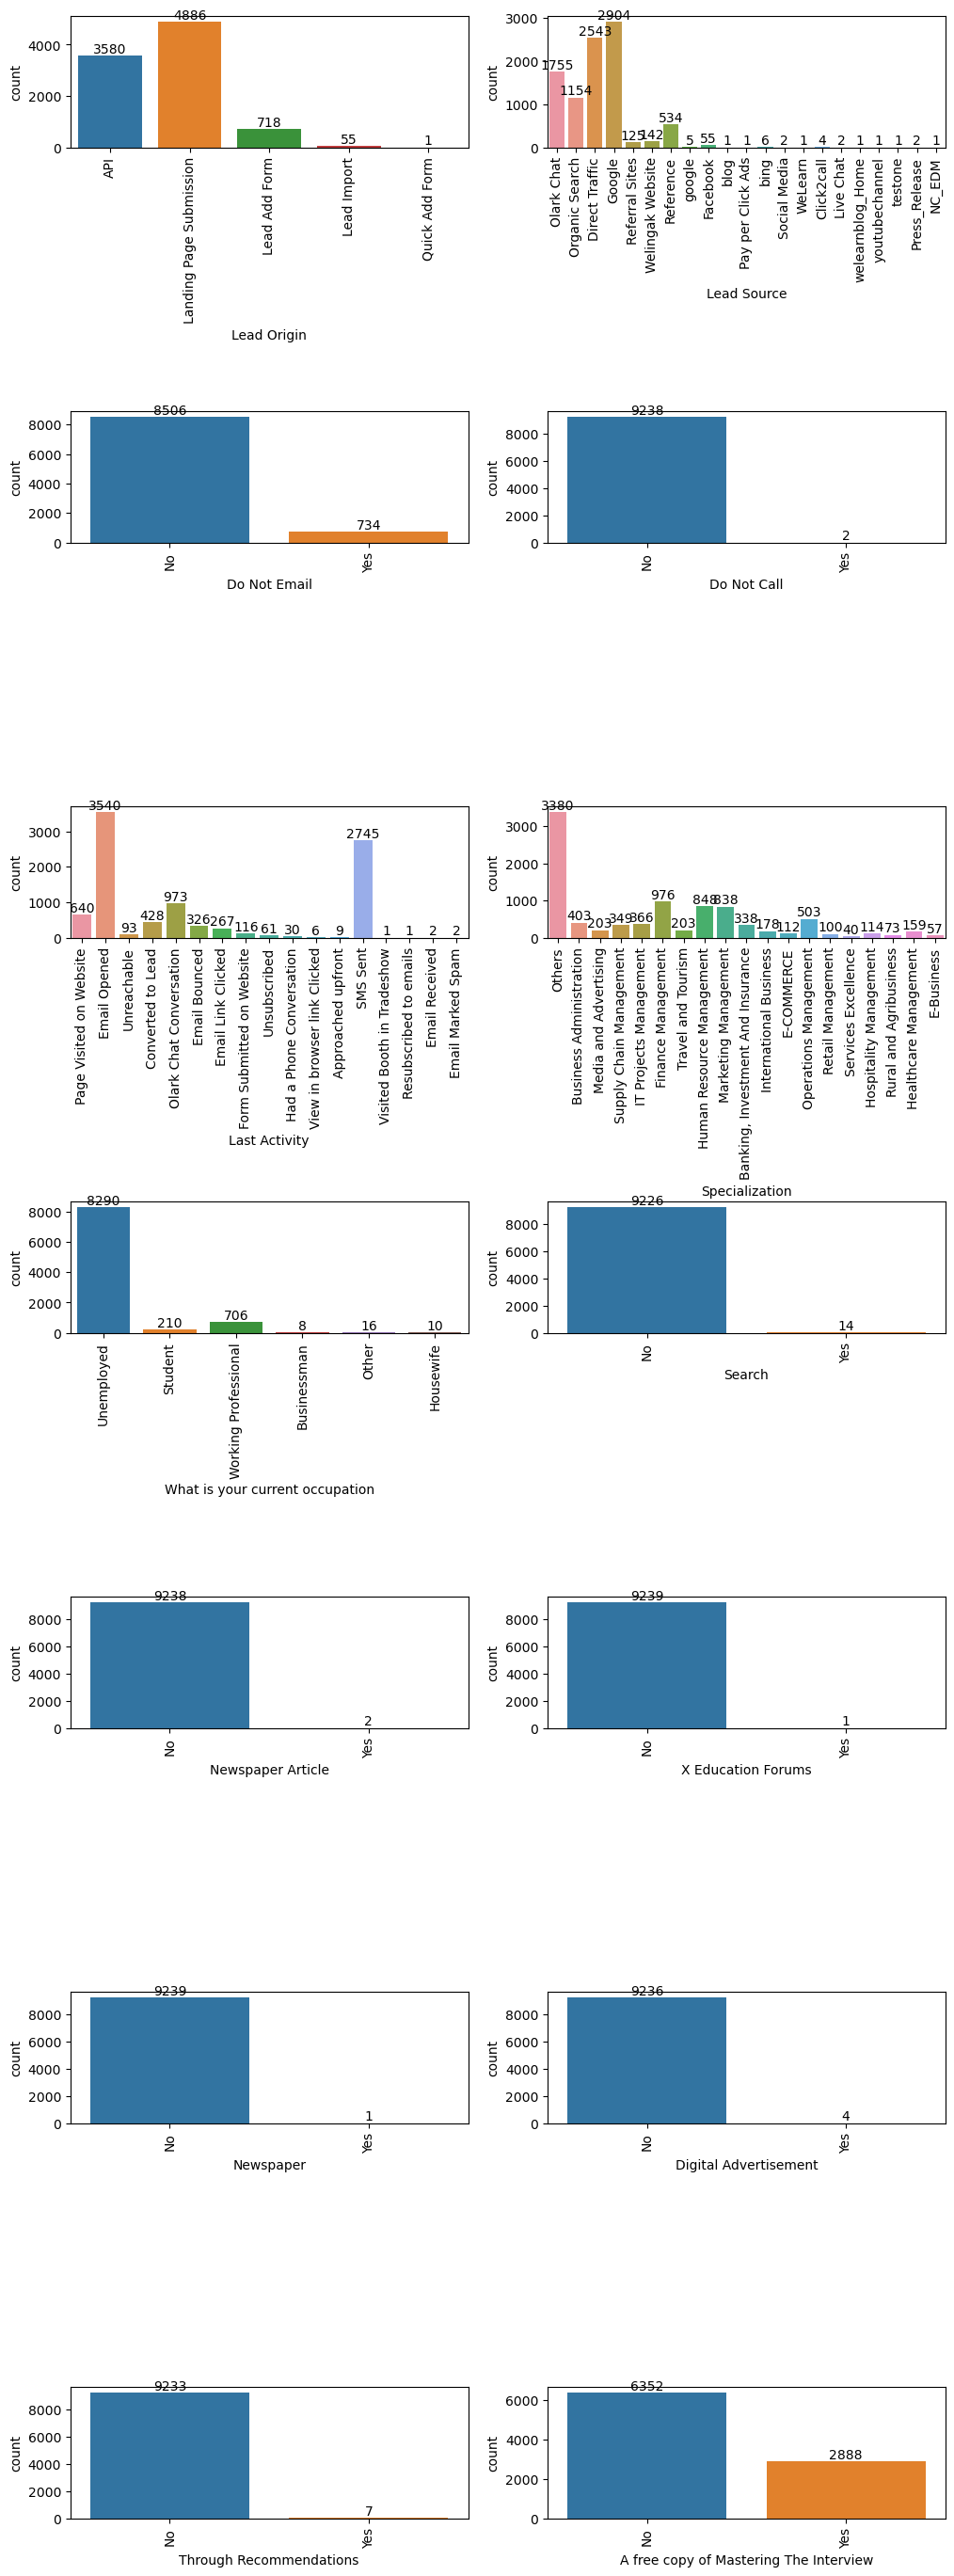

In [45]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

In [ ]:
# These columns will be dropped as they have highly skewed data :

'Do Not Email'
'Do Not Call',
'Search',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations'

In [46]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 10)


In [47]:
df_leads.head()

# Now data is clean from missing values


Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

  A free copy of Mastering The Interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No

### 3.5 : Outlier Analysis

#### 3.5.1 : For Numerical Columns

In [50]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

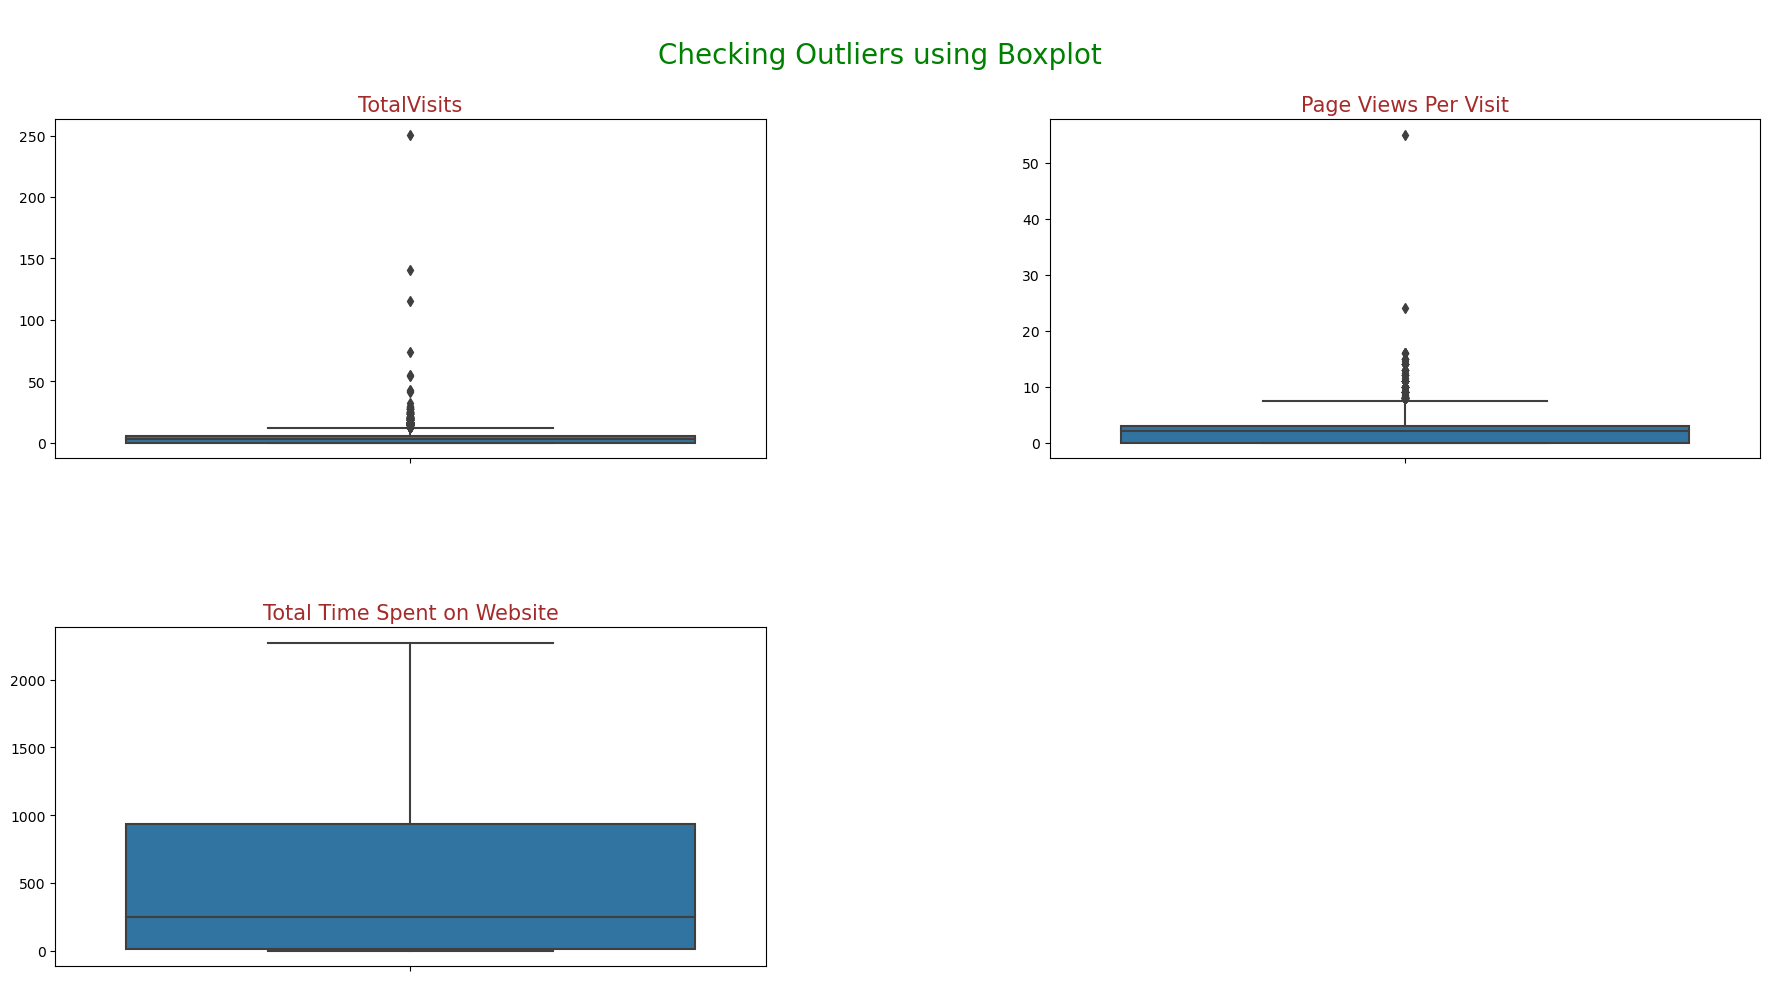

In [51]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(df_leads,num_cols)

In [ ]:
#In the boxplot,we can see that "TotalVisits","Page Views Per Visit" contain outliers which needs to be treated.
   

In [52]:
#Capping Outliers for the treatment
# before outlier treatment
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

In [53]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [54]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(df_leads,capping_cols)

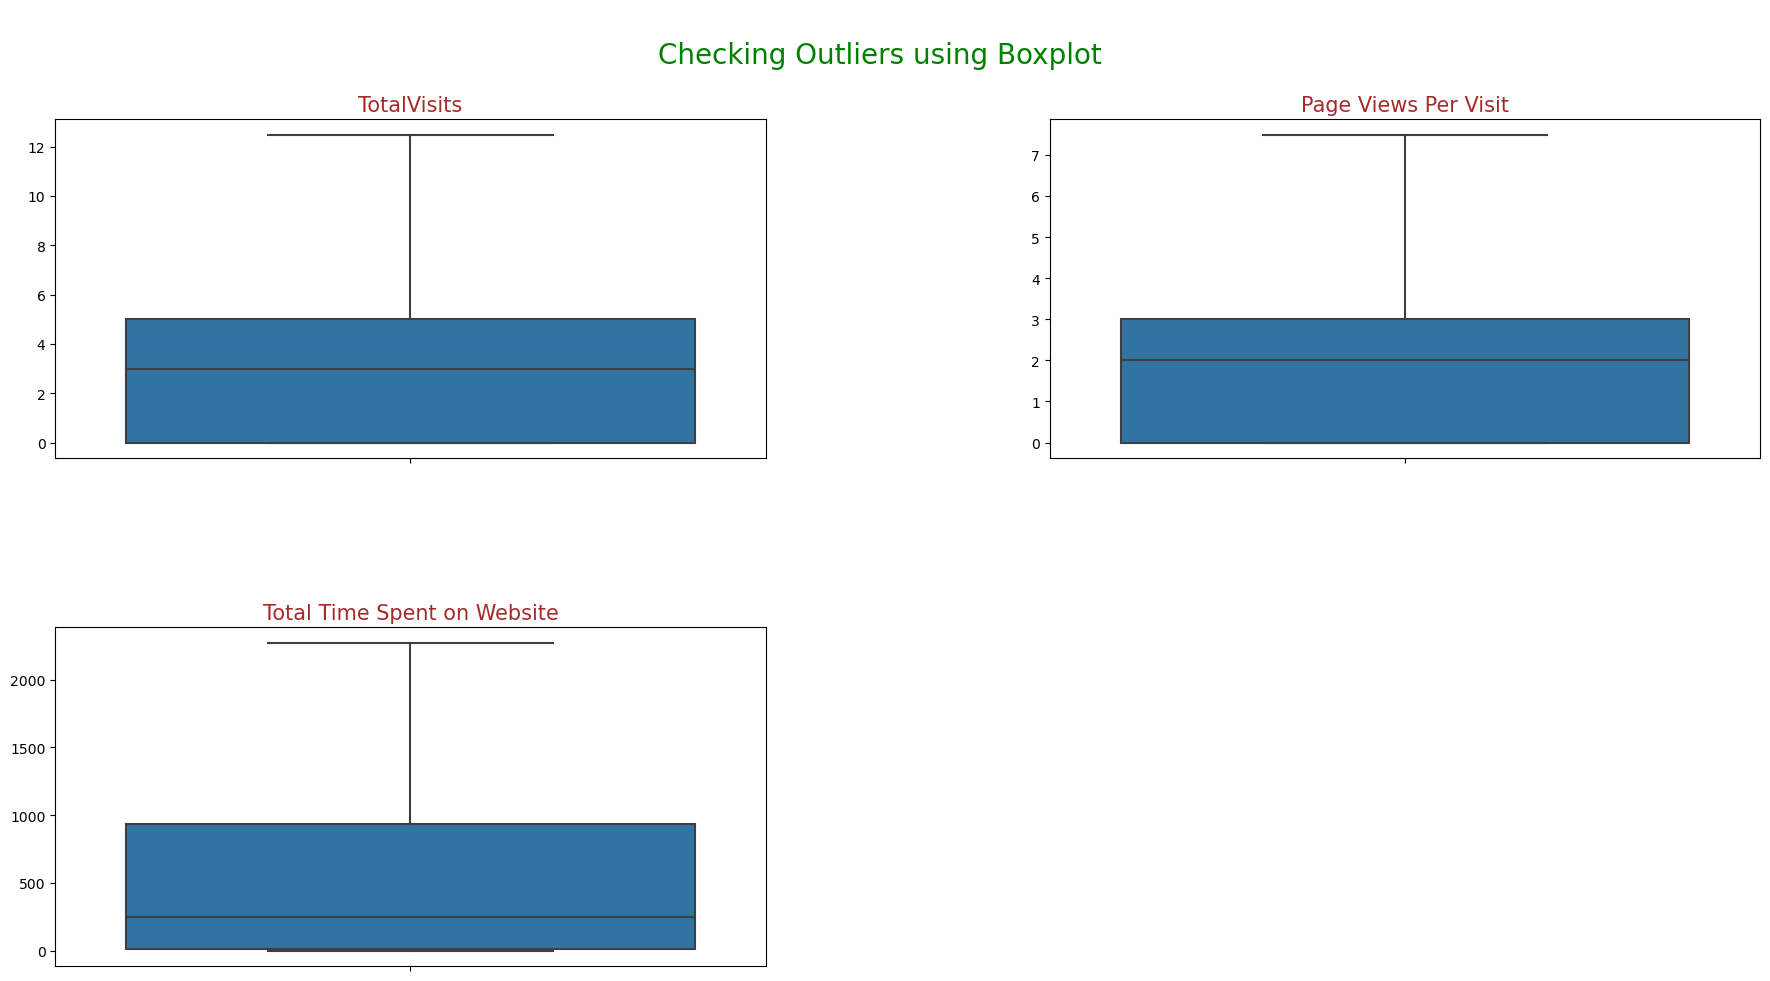

In [55]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df_leads,num_cols)

In [56]:
# after outlier treatment detailed percentile values
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

### 3.6 Fixing Invalid values & Standardising Data in columns 

In [ ]:
#Here we are checking if entries in the data are in correct format or not , casing styles (UPPER,lower)
#and Checking data types of columns.

In [57]:
df_leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

  A free copy of Mastering The Interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No

In [67]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print("--"*15,"\n")
        print(perc,"\n")
        print("__"*25,"\n")
        

value_counts % for : Lead Origin 

------------------------------ 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

__________________________________________________ 

value_counts % for : Lead Source 

------------------------------ 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
b

In [ ]:
#We've noticed that some categories in the "Lead Score" and "Last Activity" columns have very few records.
#we will group these categories together under "Others".
#we can also see "Google" & "google" are same in "Lead Source", so we will standardise the case.

#### 3.6.1 Grouping Low frequency values

In [68]:
# Grouping low frequency value levels of 'Lead Source' to others..

df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [69]:
# value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [70]:
# Grouping low frequency value levels  of 'Last Activity' to others..

df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [71]:
# value_counts percentage after replace
df_leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [72]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

#### 3.6.2 Mapping Binary categorical variables

In [ ]:
"Free_copy" is a binary categorical columns lets map both of them yes/no to 1/0

In [74]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

#### 3.6.3 Checking Data-types of variables

In [76]:
df_leads.info()
# Now the data types appear to be suitable..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Converted                    9240 non-null   int64  
 3   TotalVisits                  9240 non-null   float64
 4   Total Time Spent on Website  9240 non-null   int64  
 5   Page Views Per Visit         9240 non-null   float64
 6   Last Activity                9240 non-null   object 
 7   Specialization               9240 non-null   object 
 8   Current_occupation           9240 non-null   object 
 9   Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


## Step 4:Exploratory Data Analysis(EDA)

### 4.1 Checking if Data is Imbalanced or not

In [ ]:
#When one value is present in majority and other is in minority,Data is imbalanced
#Data imbalance is in the context of Target variable only.
#Target variable is 'Converted' which tells whether a past lead was converted or not 
#wherein 1 means it was converted and 0 means it isn’t converted

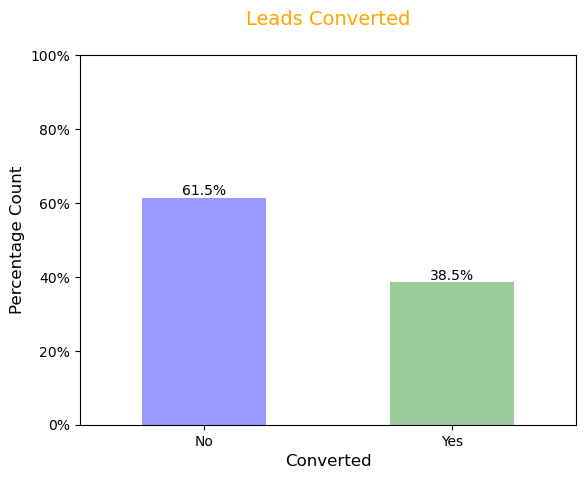

In [82]:
## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Blue","Green"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 14, 'fontweight' : 12, 'color' : 'Orange'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Black'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Black'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

In [83]:
#Only 38.5% of the people have converted to leads.(Minority)
#While 61.5% of the people didnt convert to leads. (Majority)

In [84]:
### Ratio of Data Imbalance
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


### 4.2 Univariate Analysis

In [85]:
df_leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization Current_occupation  Free_copy  
0                   Others         Unemployed          0  
1                   Others         Unemployed          0  
2  Business Administration            Student          1  
3    Media and Advertising         Unemployed          0  
4                   Others         Unemployed          0

### 4.2.1 Univariate Analysis for Categorical Variables

In [86]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

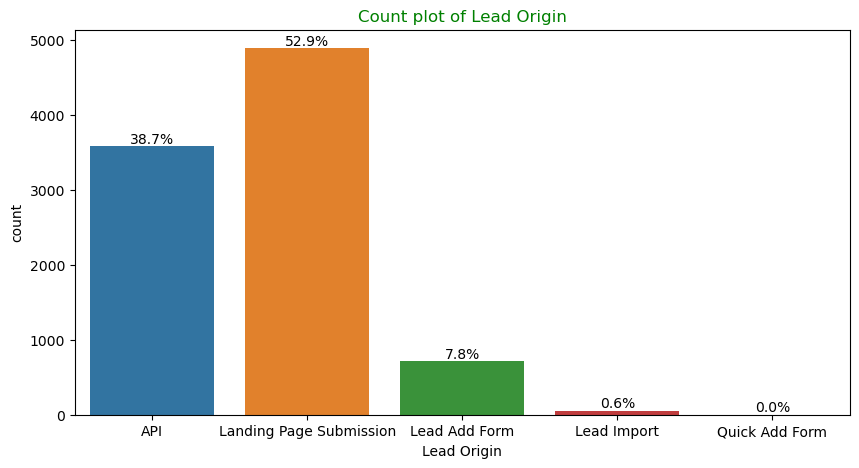

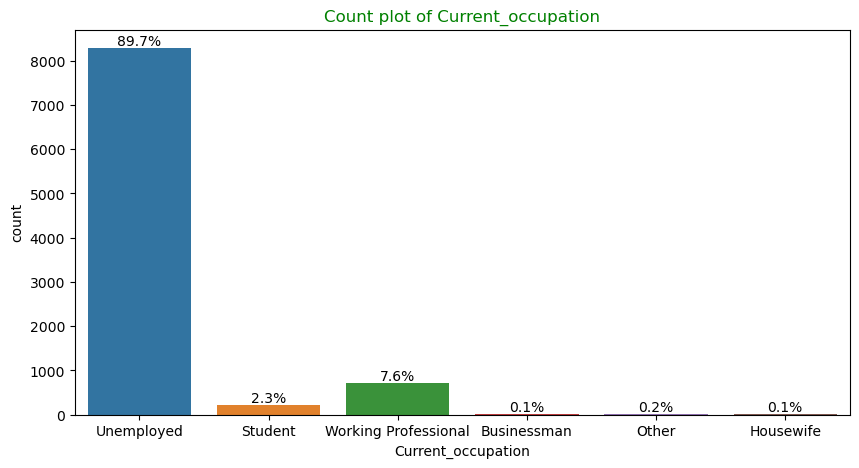

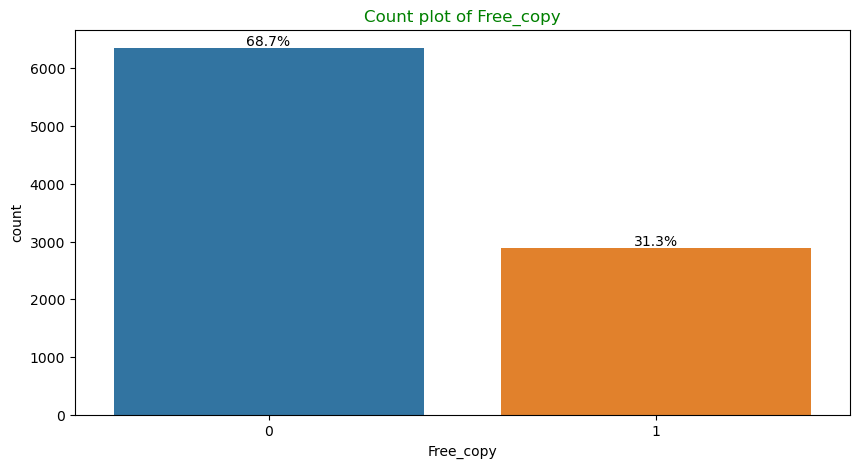

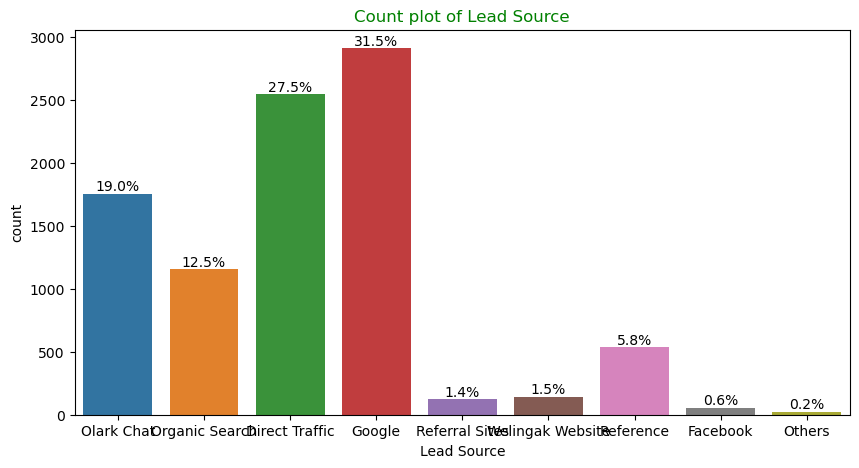

In [88]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation",
            "Free_copy","Lead Source","Last Activity","Specialization"]
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

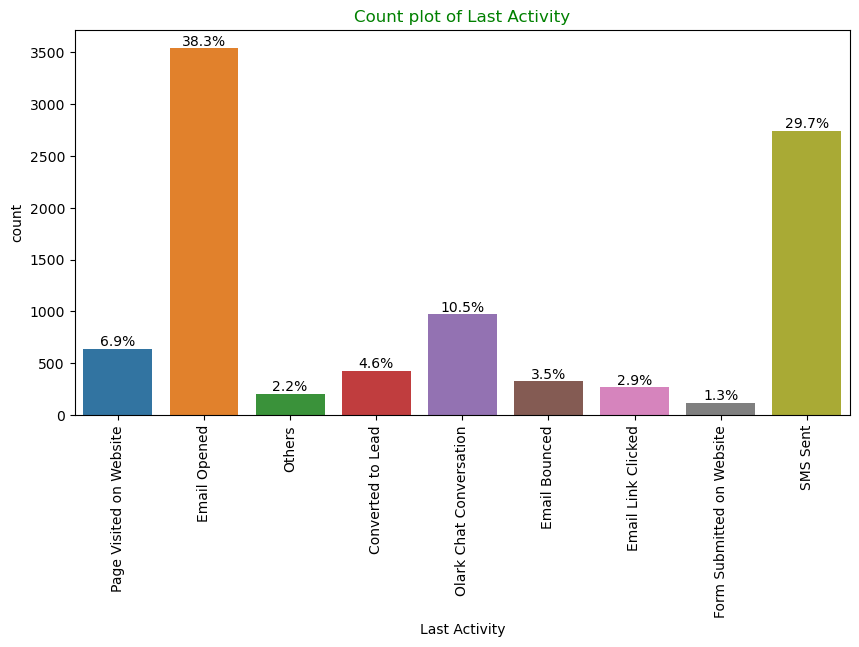

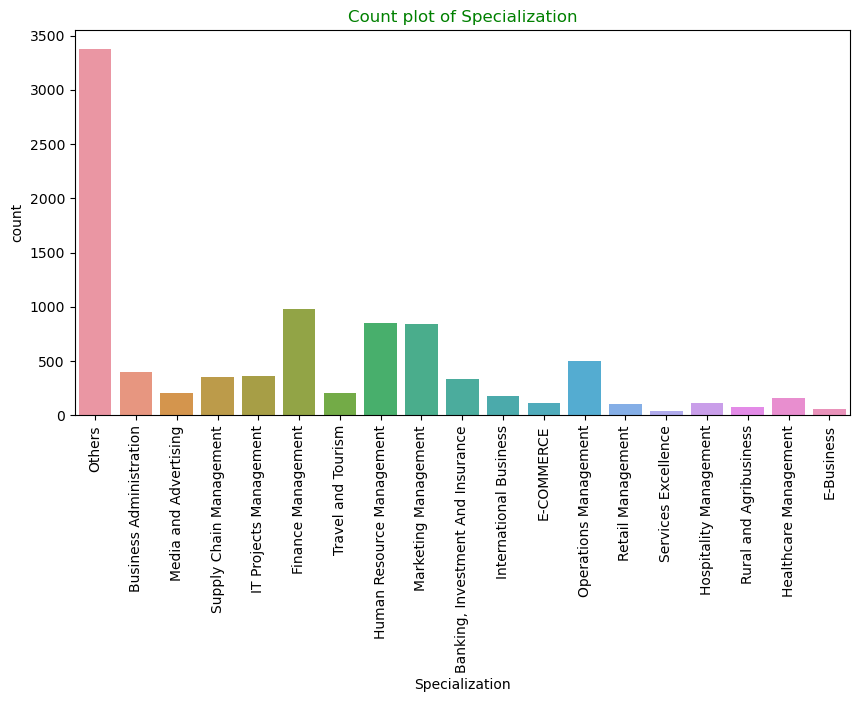

In [89]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

In [ ]:
#In Categorical Univariate Analysis,we get to know each variables value counts percentage 
#and how much is the distribution of values in each column.
#from this we get some understanding that which variables can be used in Bivariate analysis.

In [ ]:
Insights Univariate:

Lead Origin: "Landing Page Submission" has 53% customers, "API" identified 39%.

Current_occupation: It has 90% of the customers as Unemployed

Lead Source: 58% Lead source is from Google & Direct Traffic combined

Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities

### 4.3 Bivariate Analysis

In [ ]:
#Bivariate analysis happens between two variables

#### 4.3.1 Bivariate Analysis for Categorical Variables

In [95]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Count plot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)
    
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="Blue",fontsize=15)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

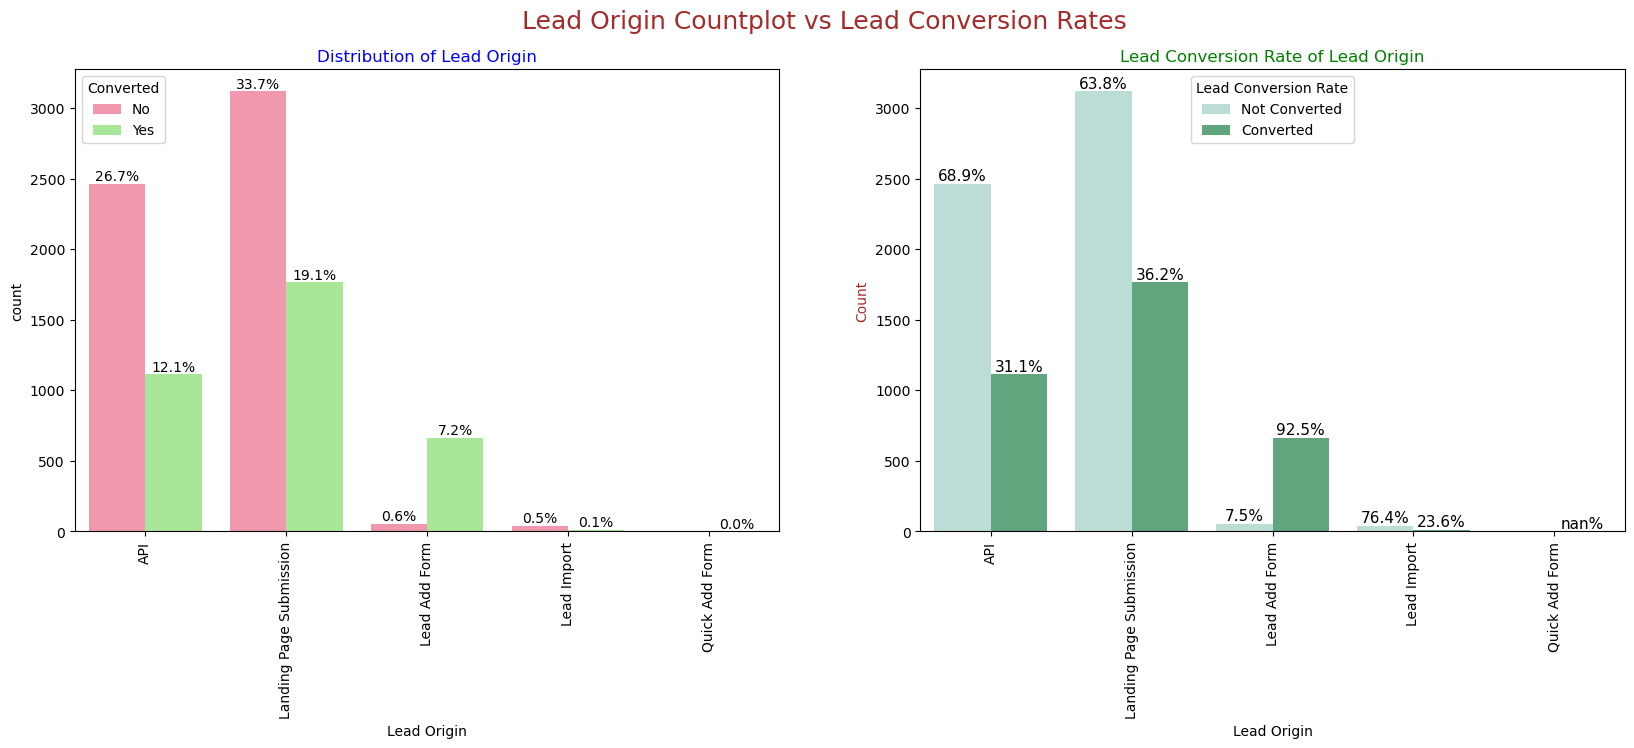

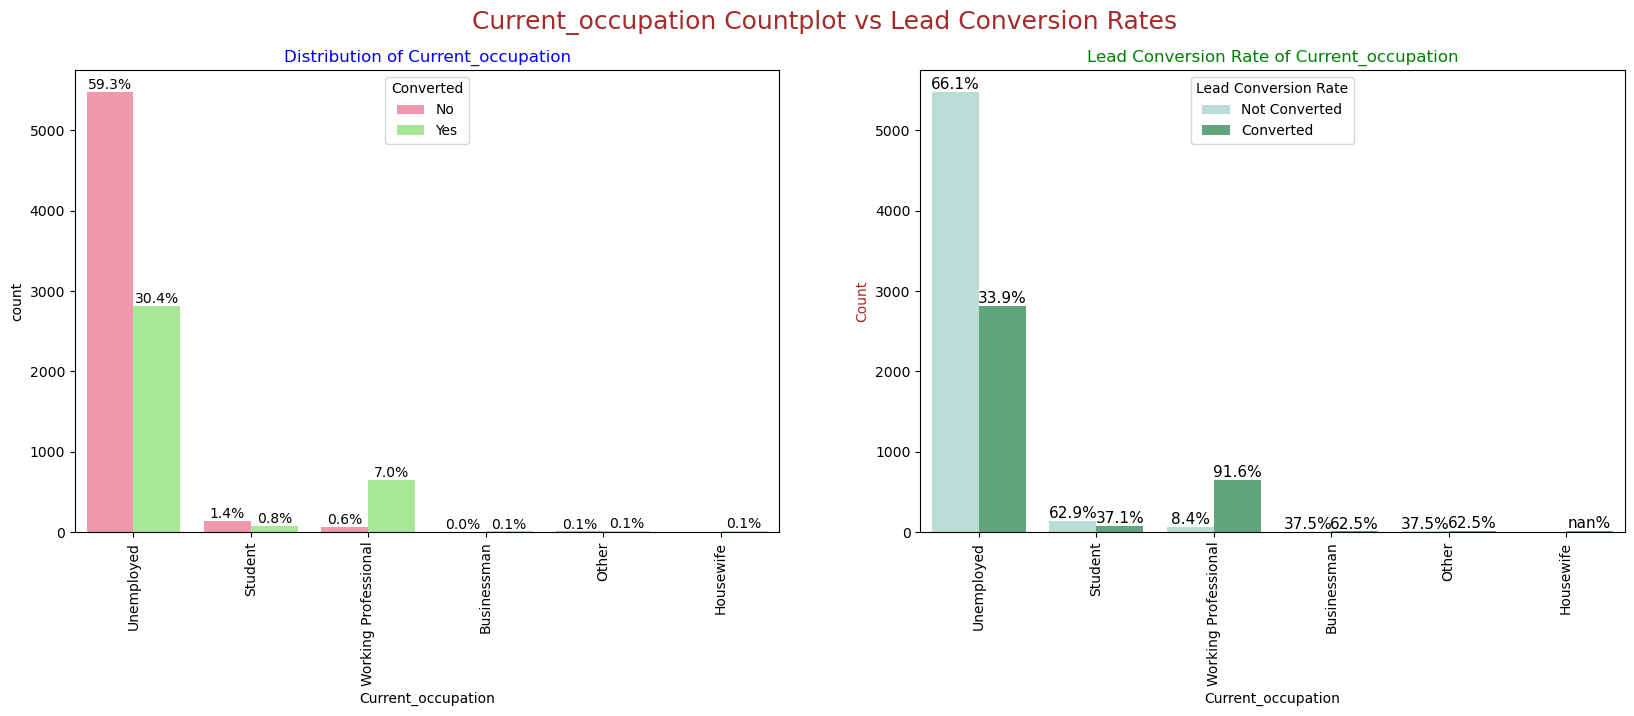

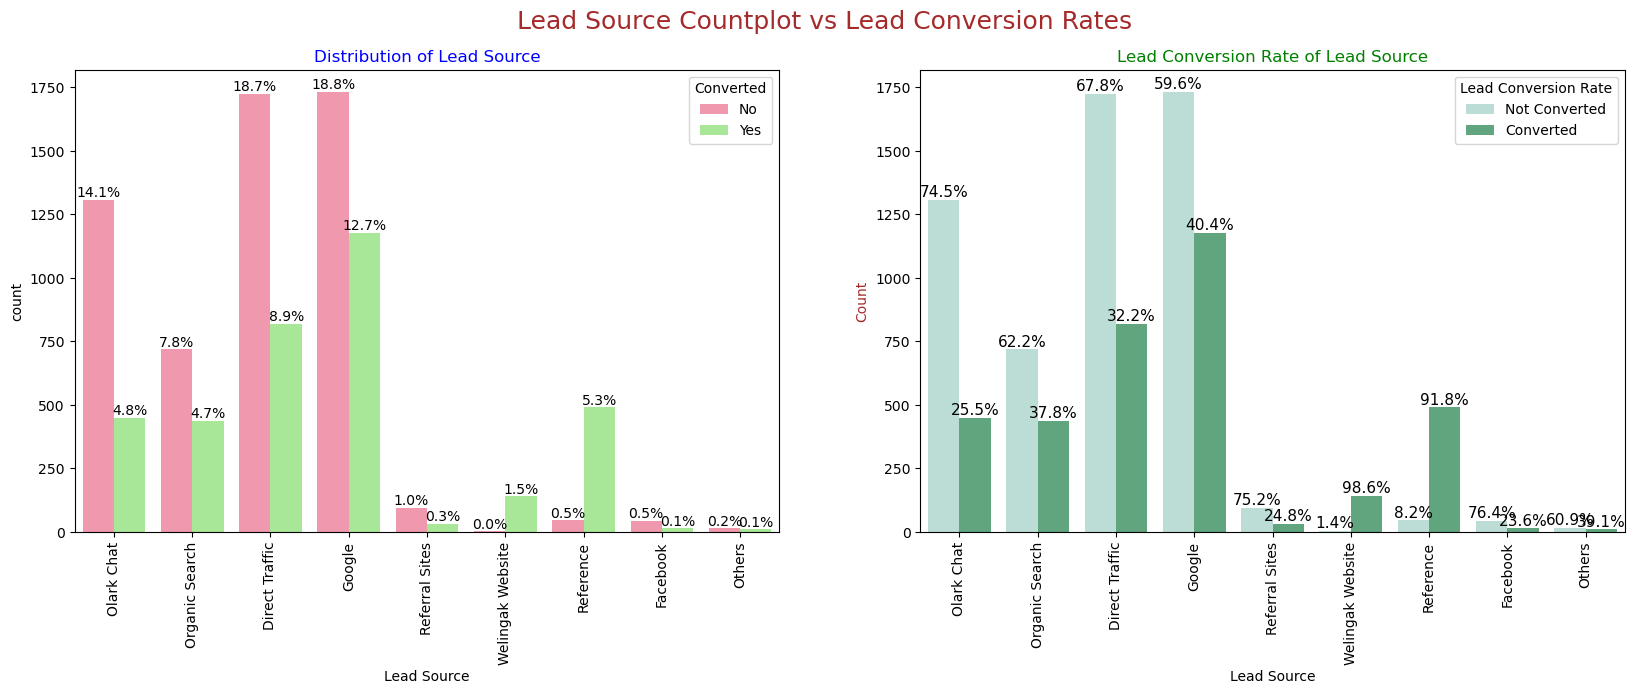

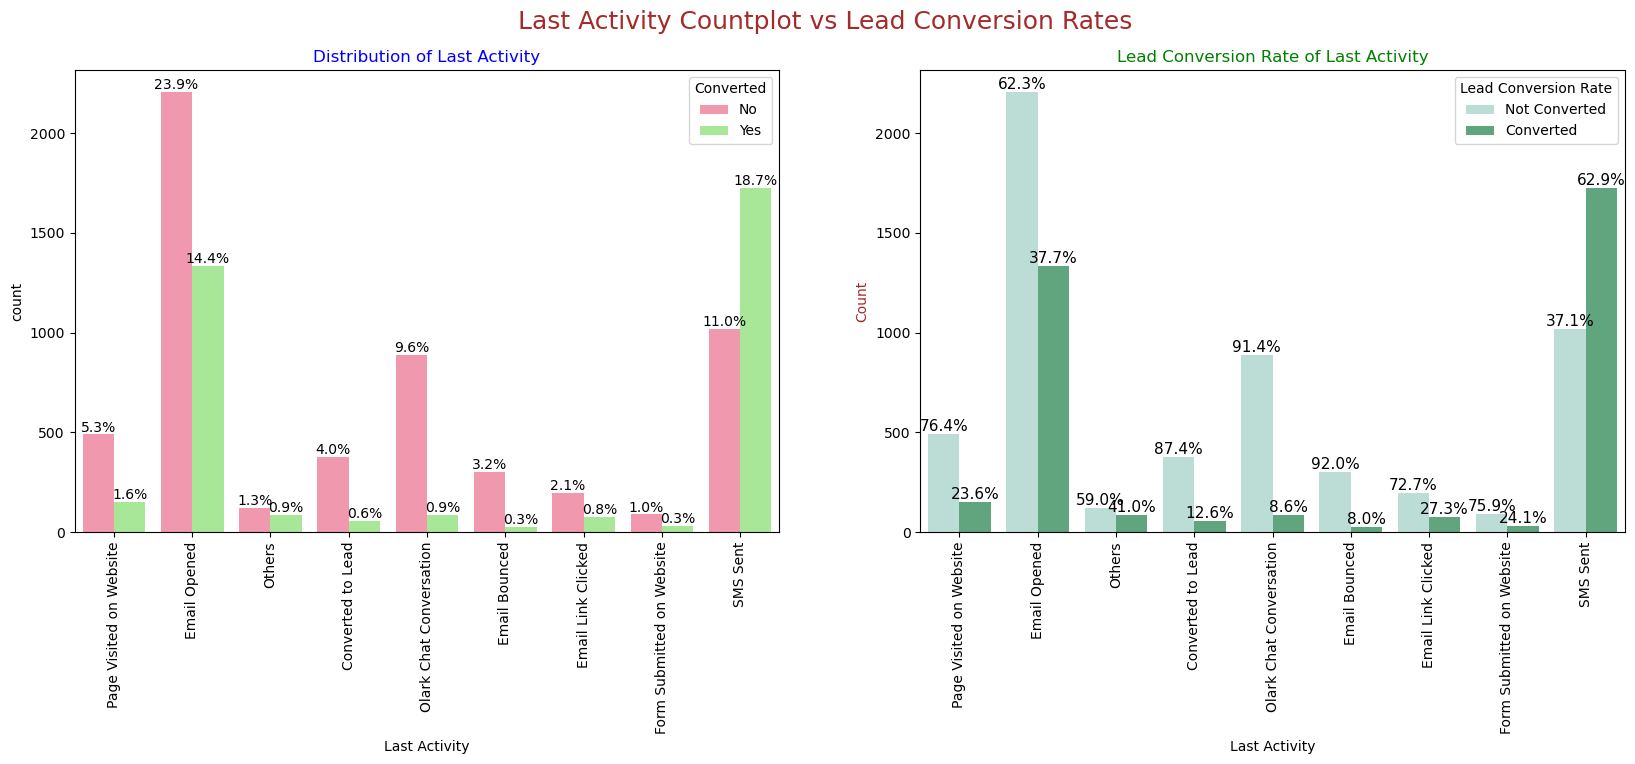

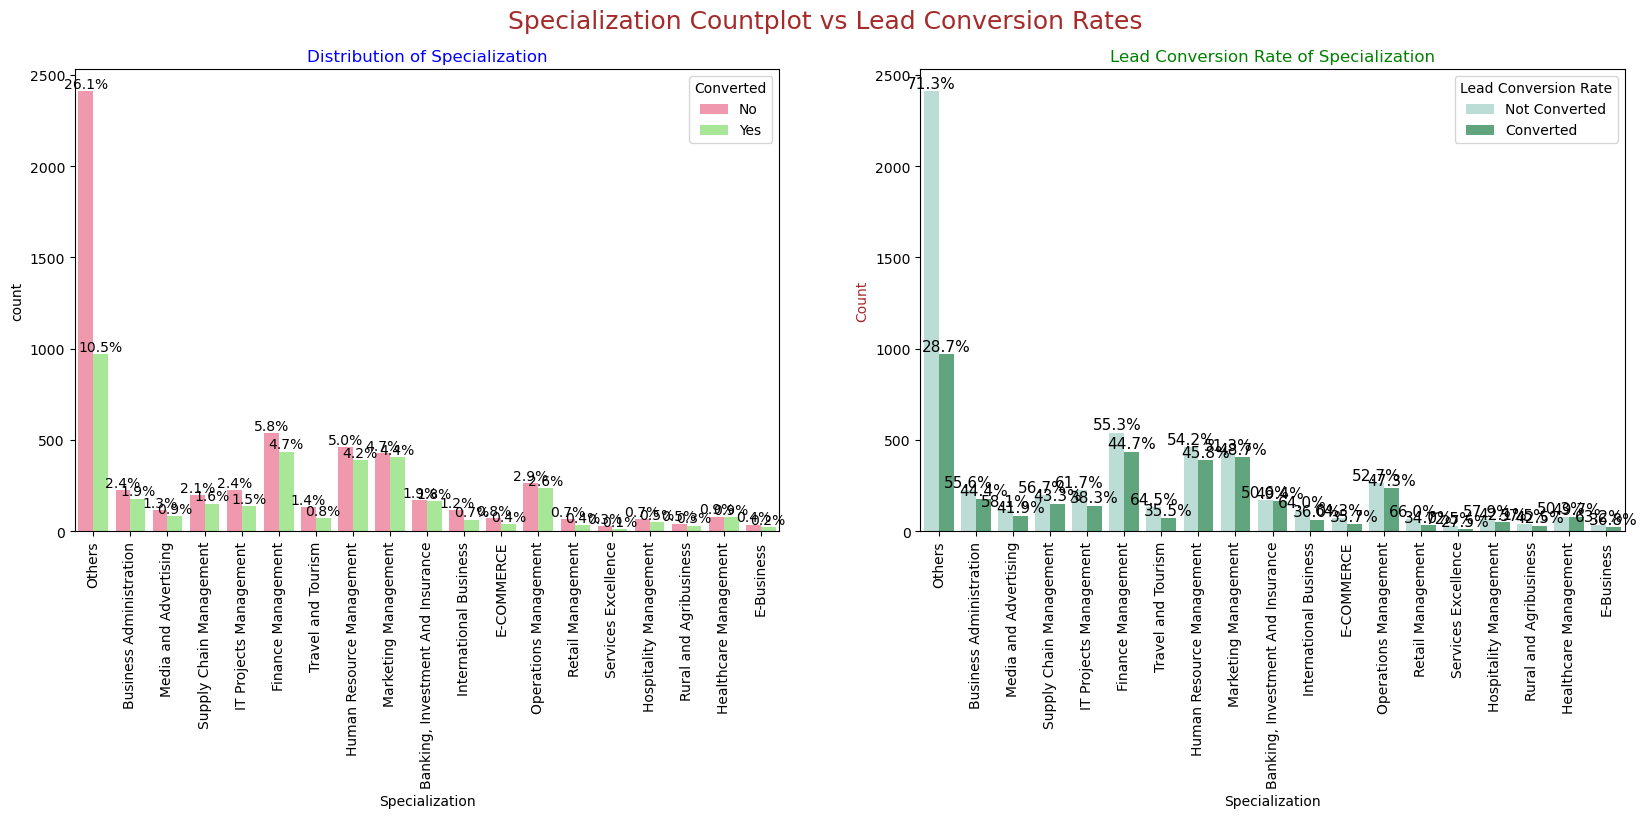

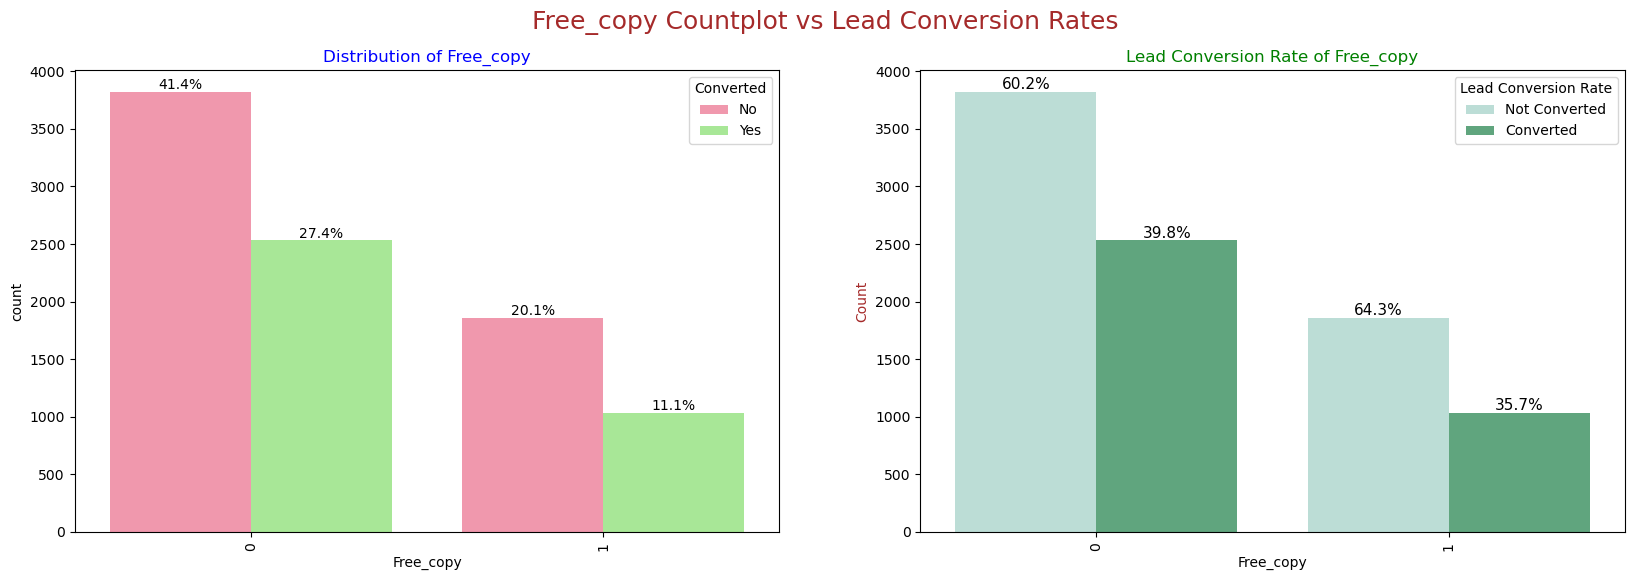

In [92]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(df_leads,variable_name=i)

In [ ]:
#Lead Origin: Around 52% of all leads originated from "Landing Page Submission" with a lead conversion rate (LCR) of 36%.The "API" identified approximately 39% of customers with a lead conversion rate (LCR) of 31%.

#Current_occupation: Around 90% of the customers are Unemployed with lead conversion rate (LCR) of 34%. While Working Professional contribute only 7.6% of total customers with almost 92% lead conversion rate (LCR).
#Lead Source: Google has LCR of 40% out of 31% customers , Direct Traffic contributes 32% LCR with 27% customers which is lower than Google,Organic Search also gives 37.8% of LCR but the contribution is by only 12.5% of customers ,Reference has LCR of 91% but there are only around 6% of customers through this Lead Source.

#Last Activity: 'SMS Sent' has high lead conversion rate of 63% with 30% contribution from last activities, 'Email Opened' activity contributed 38% of last activities performed by the customers with 37% lead conversion rate.

#Specialization: Marketing Managemt,HR Management,Finance Management shows good contribution.


#### 4.3.2 Bivariate Analysis for Numerical Variables

<Figure size 1600x400 with 0 Axes>

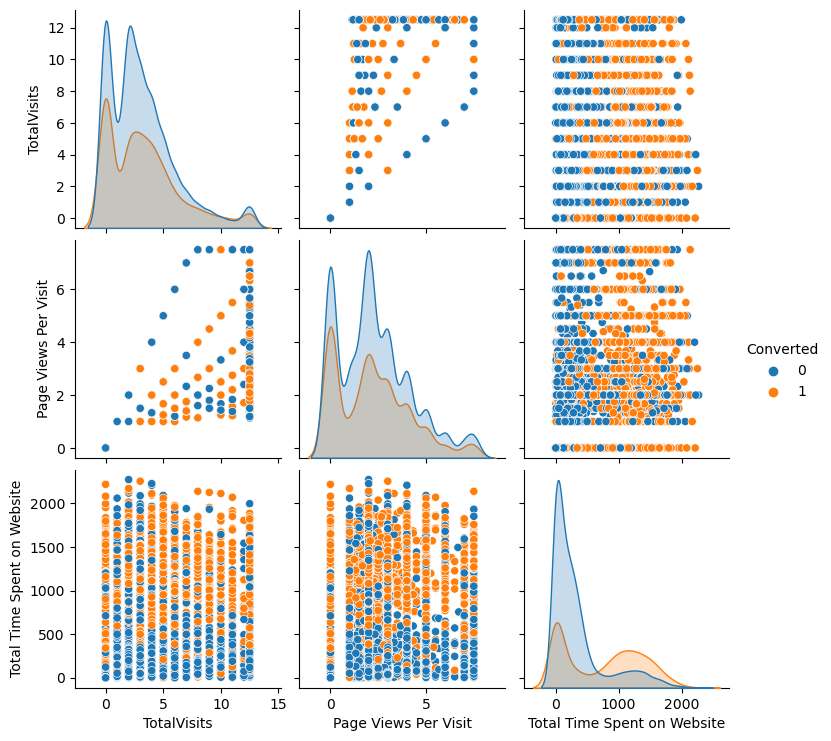

In [97]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

In [98]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

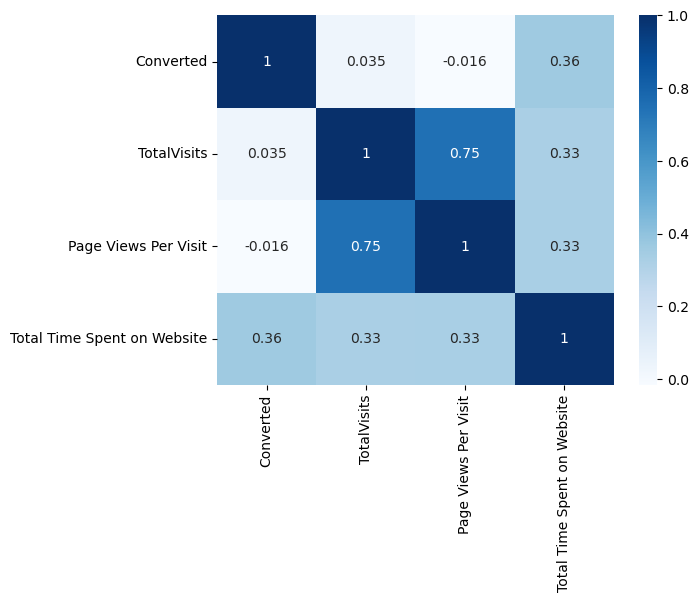

In [99]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

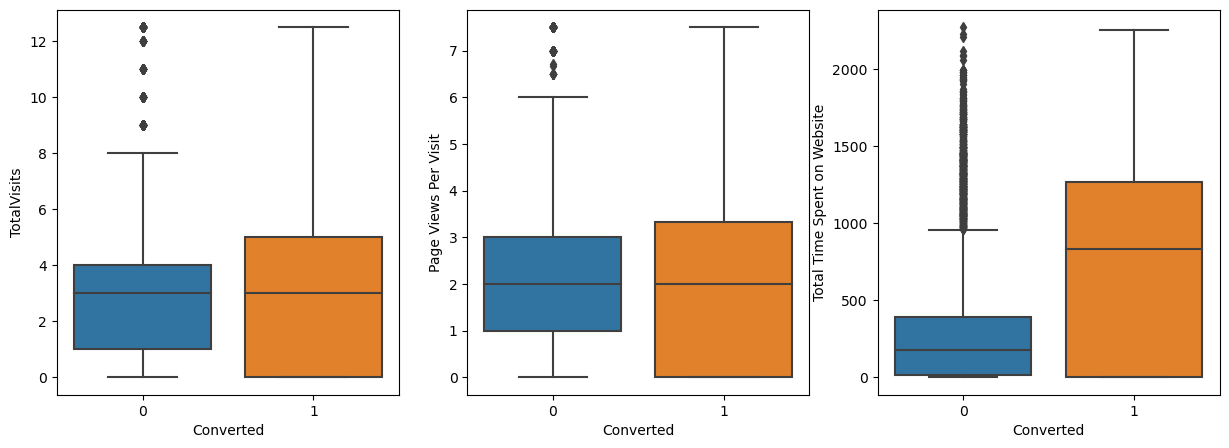

In [100]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

In [ ]:
#Insights:

Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot


## Step 5: Data Preparation

### 5.1 Dummy Variables

In [101]:
df_leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization Current_occupation  Free_copy  
0                   Others         Unemployed          0  
1                   Others         Unemployed          0  
2  Business Administration            Student          1  
3    Media and Advertising         Unemployed          0  
4                   Others         Unemployed          0

In [102]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [103]:
df_leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization Current_occupation  Free_copy  ...  \
0                   Others         Unemployed          0  ...   
1                   Others         Unemployed          0  ...   
2  Business Administration            Student          1  ...   
3    Media and Advertising         Unemployed          0  ...   
4                   Others         Unemployed          0  ...   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  Current_occupation_Housewife  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   

   Current_occupation_Other  Current_occupation_Student  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   Current_occupation_Unemployed  Current_occupation_Working Professional  
0                              1                                        0  
1                              1                                        0  
2                              0                                        0  
3                              1                                        0  
4                              1                                        0  

[5 rows x 53 columns]

In [104]:
# We have created dummies for the below variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)


In [105]:
df_leads.shape

(9240, 48)

In [106]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Converted                                 9240 non-null   int64  
 1   TotalVisits                               9240 non-null   float64
 2   Total Time Spent on Website               9240 non-null   int64  
 3   Page Views Per Visit                      9240 non-null   float64
 4   Free_copy                                 9240 non-null   int64  
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

## Step 6: Test-Train Split 

In [107]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]

In [113]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [114]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 47) 
y_train: (6468,)


In [115]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 47) 
y_test: (2772,)


## Step 7: Feature Scaling

In [116]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [117]:
# X-train dataframe after standard scaling
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1871    -1.064974                    -0.885371             -1.184892   
6795     0.262370                     0.005716             -0.488713   
3516     0.594206                    -0.691418              0.123715   
8105     0.594206                     1.365219              1.432322   
3934    -1.064974                    -0.885371             -1.184892   

      Free_copy  Lead Origin_Landing Page Submission  \
1871  -0.673169                                    0   
6795   1.485511                                    1   
3516  -0.673169                                    0   
8105  -0.673169                                    1   
3934  -0.673169                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           0                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      ...  Specialization_Retail Management  \
1871  ...                                 0   
6795  ...                                 0   
3516  ...                                 0   
8105  ...                                 0   
3934  ...                                 0   

      Specialization_Rural and Agribusiness  \
1871                                      0   
6795                                      0   
3516                                      0   
8105                                      0   
3934                                      0   

      Specialization_Services Excellence  \
1871                                   0   
6795                                   0   
3516                                   0   
8105                                   1   
3934                                   0   

      Specialization_Supply Chain Management  \
1871                                       0   
6795                                       0   
3516                                       0   
8105                                       0   
3934                                       0   

      Specialization_Travel and Tourism  Current_occupation_Housewife  \
1871                                  0                             0   
6795                                  0                             0   
3516                                  0                             0   
8105                                  0                             0   
3934                                  0                             0   

      Current_occupation_Other  Current_occupation_Student  \
1871                         0                           0   
6795                         0                           0   
3516                         0                           0   
8105                         0                           0   
3934                         0                           0   

      Current_occupation_Unemployed  Current_occupation_Working Professional  
1871                              1                                        0  
6795                              1                                        0  
3516                              1                                        0  
8105                              1                                        0  
3934                              1                                        0  


In [118]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

In [119]:
#We have 38.5% Conversion Rate

### 7.1 : Looking at Correlations

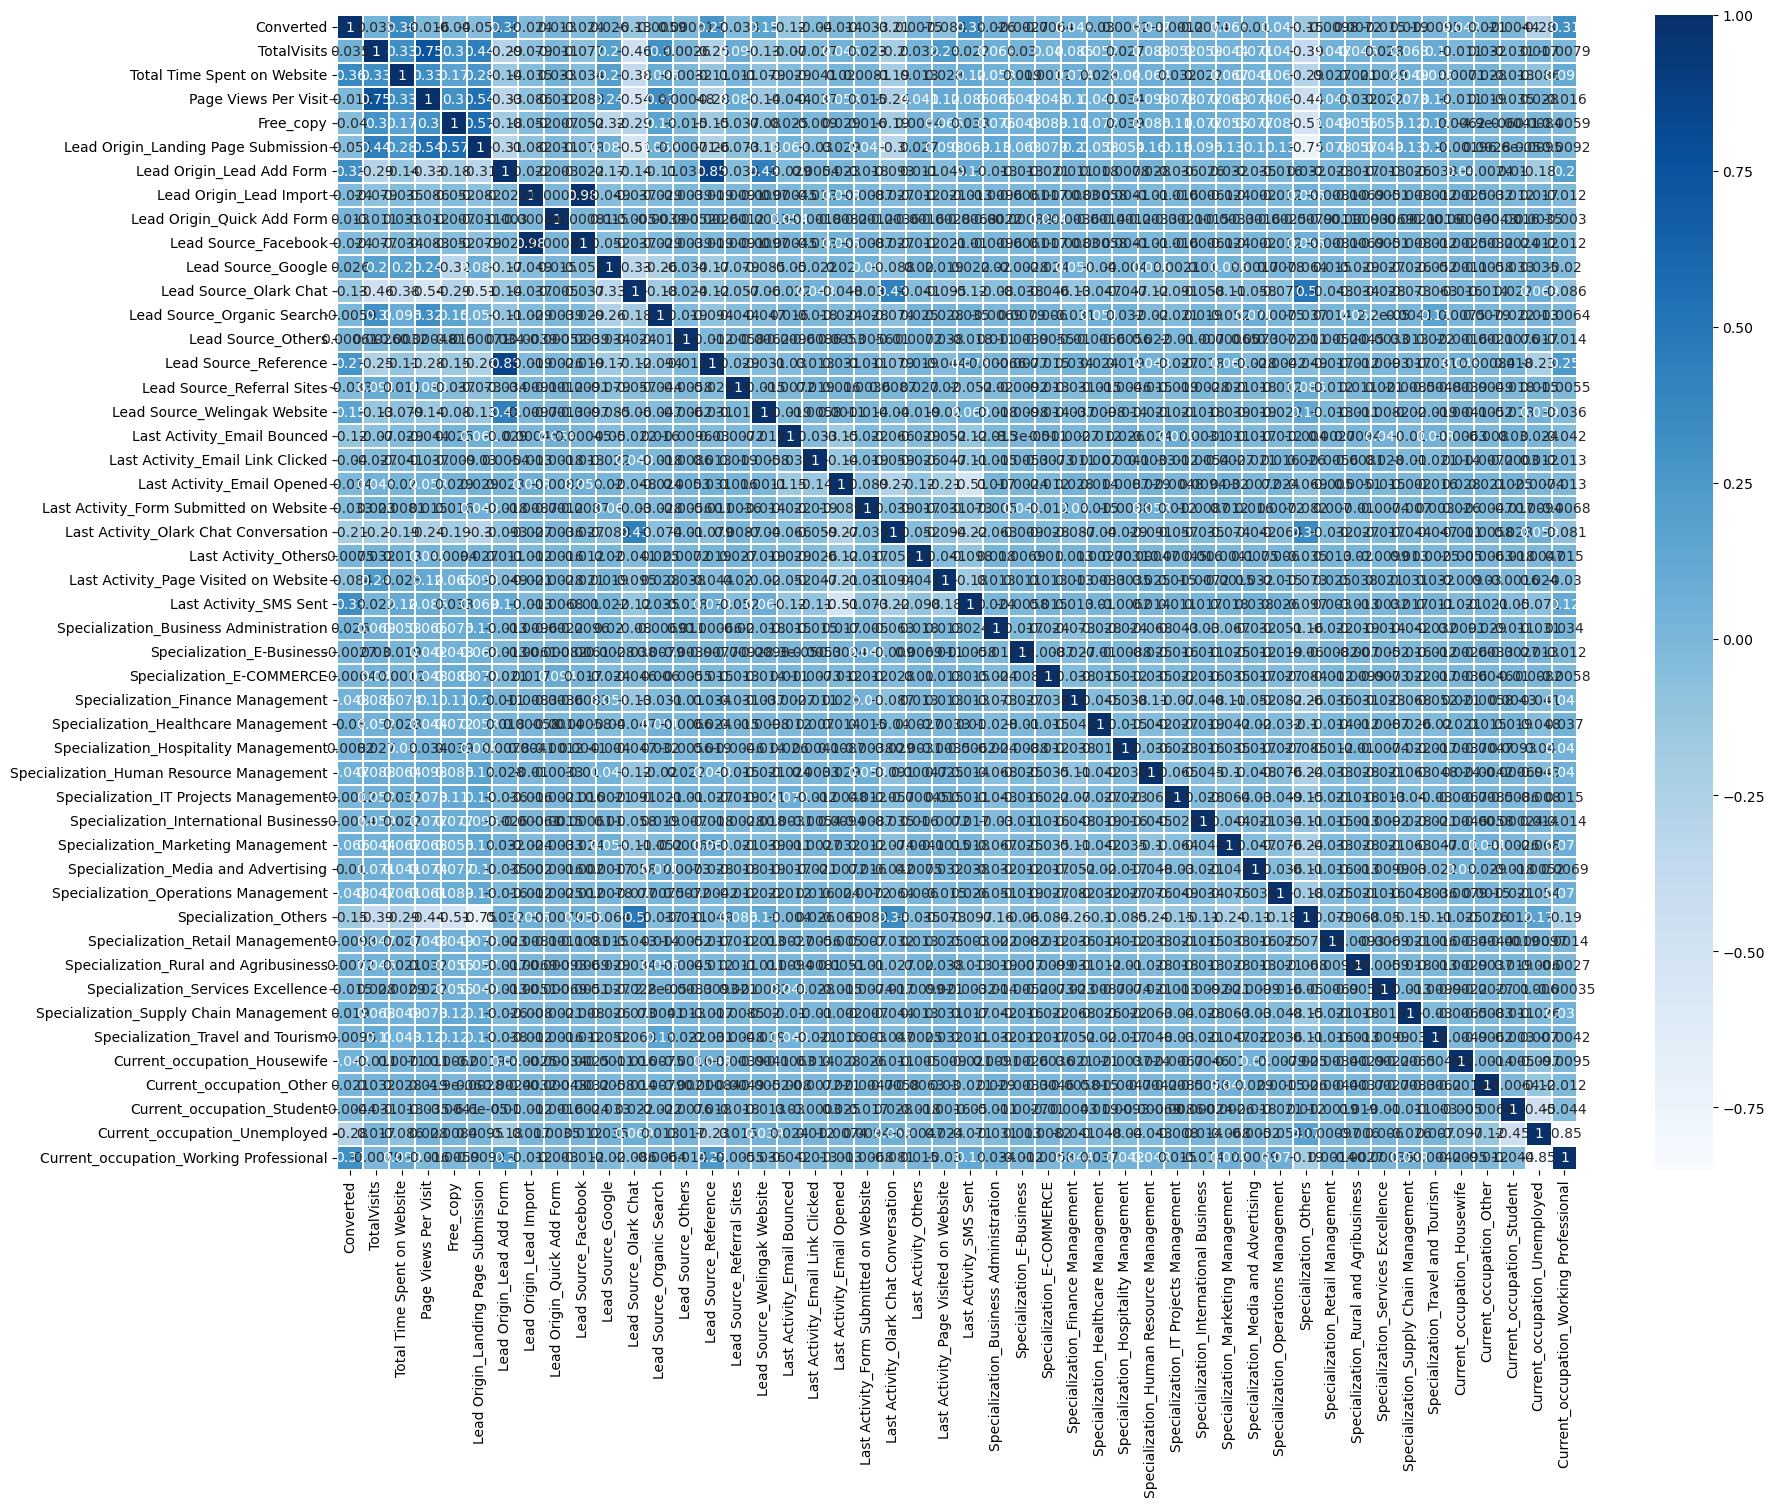

In [120]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

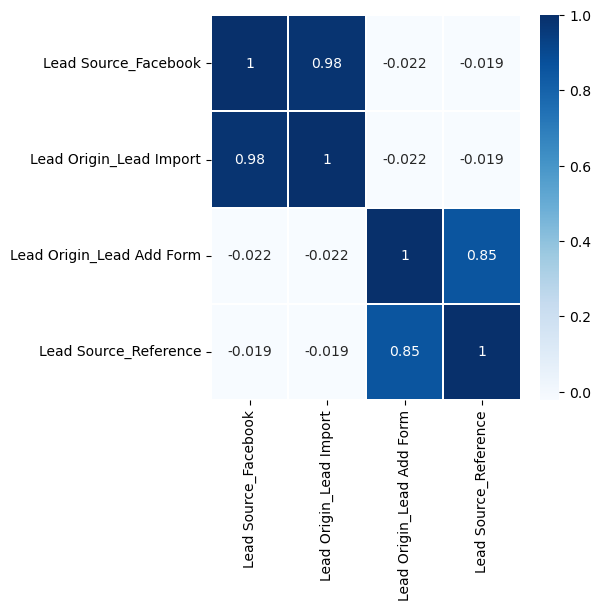

In [121]:
# as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

In [ ]:
Note: These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.

In [122]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## Step 8: Model Building

### 8.1 Feature Selection Using RFE (Recursive Feature Elimination)

In [123]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [124]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 21),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 20),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 9),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 30),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 13),
 ('Specialization_E-Busin

In [125]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
44   Current_occupation_Working Professional            True        1
21                    Last Activity_SMS Sent            True        1
19                      Last Activity_Others            True        1
18     Last Activity_Olark Chat Conversation            True        1
34                     Specialization_Others            True        1
16                Last Activity_Email Opened            True        1
14               Last Activity_Email Bounced            True        1
13              Lead Source_Welingak Website            True        1
10                        Lead Source_Others            True        1
11                     Lead Source_Reference            True        1
8                     Lead Source_Olark Chat            True        1
40              Current_occupation_Housewife            True        1
4        Lead Origin_Landing Page Submission            True        1
1                Total Time Spent on Website            True        1
27     Specialization_Hospitality Management            True        1
6                       Lead Source_Facebook           False        2
43             Current_occupation_Unemployed           False        3
41                  Current_occupation_Other           False        4
42                Current_occupation_Student           False        5
36     Specialization_Rural and Agribusiness           False        6
35          Specialization_Retail Management           False        7
30     Specialization_International Business           False        8
15          Last Activity_Email Link Clicked           False        9
2                       Page Views Per Visit           False       10
0                                TotalVisits           False       11
7                         Lead Source_Google           False       12
22    Specialization_Business Administration           False       13
20     Last Activity_Page Visited on Website           False       14
37        Specialization_Services Excellence           False       15
33      Specialization_Operations Management           False       16
28  Specialization_Human Resource Management           False       17
31       Specialization_Marketing Management           False       18
38    Specialization_Supply Chain Management           False       19
5                 Lead Origin_Quick Add Form           False       20
3                                  Free_copy           False       21
39         Specialization_Travel and Tourism           False       22
24                 Specialization_E-COMMERCE           False       23
9                 Lead Source_Organic Search           False       24
29     Specialization_IT Projects Management           False       25
25         Specialization_Finance Management           False       26
26      Specialization_Healthcare Management           False       27
23                 Specialization_E-Business           False       28
32      Specialization_Media and Advertising           False       29
17   Last Activity_Form Submitted on Website           False       30
12                Lead Source_Referral Sites           False       31

In [126]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [127]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply

In [128]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [129]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                      -0.929643
Total Time Spent on Website                 1.055070
Lead Origin_Landing Page Submission        -1.238873
Lead Source_Olark Chat                      0.927496
Lead Source_Others                          0.963724
Lead Source_Reference                       2.938917
Lead Source_Welingak Website                5.433743
Last Activity_Email Bounced                -1.016214
Last Activity_Email Opened                  0.809915
Last Activity_Olark Chat Conversation      -0.690260
Last Activity_Others                        1.124692
Last Activity_SMS Sent                      1.929869
Specialization_Hospitality Management      -1.060803
Specialization_Others                      -1.175899
Current_occupation_Housewife               22.989851
Current_occupation_Working Professional     2.673814
dtype: float64

In [133]:
#summary of our logistic regression model 1
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2727.1
Date:                Tue, 24 Oct 2023   Deviance:                       5454.1
Time:                        12:30:06   Pearson chi2:                 8.06e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3850
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [131]:
#"Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

### Model 2

In [136]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                     -0.920975
Total Time Spent on Website                1.053942
Lead Origin_Landing Page Submission       -1.233888
Lead Source_Olark Chat                     0.926589
Lead Source_Others                         0.956796
Lead Source_Reference                      2.957574
Lead Source_Welingak Website               5.433266
Last Activity_Email Bounced               -1.026487
Last Activity_Email Opened                 0.807604
Last Activity_Olark Chat Conversation     -0.695973
Last Activity_Others                       1.114136
Last Activity_SMS Sent                     1.919209
Specialization_Hospitality Management     -1.067911
Specialization_Others                     -1.179710
Current_occupation_Working Professional    2.665874
dtype: float64

In [137]:
#summary of our logistic regression model 2
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2734.5
Date:                Tue, 24 Oct 2023   Deviance:                       5469.0
Time:                        12:31:36   Pearson chi2:                 8.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3836
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [138]:
# "Lead Source_Others" column will be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 for statistical significance.

# Dropping 'Lead Source_Others' column
rfe_col=rfe_col.drop("Lead Source_Others") 

### Model 3

In [139]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                     -0.903890
Total Time Spent on Website                1.051968
Lead Origin_Landing Page Submission       -1.243095
Lead Source_Olark Chat                     0.917136
Lead Source_Reference                      2.946242
Lead Source_Welingak Website               5.425696
Last Activity_Email Bounced               -1.031518
Last Activity_Email Opened                 0.805559
Last Activity_Olark Chat Conversation     -0.694138
Last Activity_Others                       1.117628
Last Activity_SMS Sent                     1.914872
Specialization_Hospitality Management     -1.071761
Specialization_Others                     -1.188329
Current_occupation_Working Professional    2.659976
dtype: float64

In [140]:
#summary of our logistic regression model 3
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.2
Date:                Tue, 24 Oct 2023   Deviance:                       5472.3
Time:                        12:33:26   Pearson chi2:                 8.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3833
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [141]:
# Model 3 is stable and has significant p-values within the threshold (p-values < 0.05)

In [143]:
#checking VIFs for these variables to check if there is any multicollinearity which exists among the independent variables
get_vif(X_train_rfe)

Features   VIF
0       Lead Origin_Landing Page Submission  2.82
1                     Specialization_Others  2.65
2                Last Activity_Email Opened  2.60
3                    Last Activity_SMS Sent  2.40
4                    Lead Source_Olark Chat  2.16
5     Last Activity_Olark Chat Conversation  1.80
6                     Lead Source_Reference  1.33
7               Total Time Spent on Website  1.24
8   Current_occupation_Working Professional  1.21
9               Last Activity_Email Bounced  1.18
10             Lead Source_Welingak Website  1.09
11                     Last Activity_Others  1.09
12    Specialization_Hospitality Management  1.02

In [144]:
#No variable needs to be dropped as they all have good VIF values less than 5.

## Step 9: Model Evaluation

In [145]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.471885
6795    0.074210
3516    0.250326
8105    0.769245
3934    0.214012
4844    0.987722
3297    0.108206
8071    0.996108
987     0.189255
7423    0.869868
dtype: float64

In [146]:
#array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47188529, 0.07421047, 0.2503261 , 0.7692451 , 0.21401248,
       0.98772192, 0.10820613, 0.99610804, 0.18925483, 0.86986777])

In [147]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

Converted  Converted_Prob  Prospect ID
0          0        0.471885         1871
1          0        0.074210         6795
2          0        0.250326         3516
3          0        0.769245         8105
4          0        0.214012         3934

In [148]:
#finding the optimal cutoff Threshold value of Probability.
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.471885         1871          0
1          0        0.074210         6795          0
2          0        0.250326         3516          0
3          0        0.769245         8105          1
4          0        0.214012         3934          0

### 9.1 Confusion Matrix

In [149]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3587  415]
 [ 839 1627]]


In [150]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3587       |   415
# converted           839        |   1627  


# Above is the confusion matrix when we use threshold of probability as 0.5

### 9.2 Accuracy

In [151]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8061224489795918


### 9.3 Metrics beyond simply accuracy

In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6597729115977291


In [154]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8963018490754623


In [155]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10369815092453773


In [156]:
# positive predictive value 
print (TP / float(TP+FP))

0.796767874632713


In [157]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8104383190239494


### 9.4 Plotting the ROC Curve

In [158]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [159]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

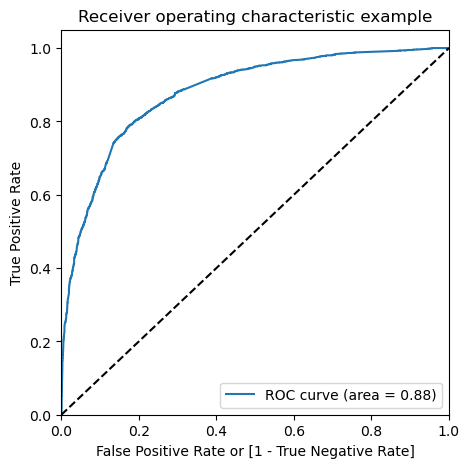

In [160]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

In [161]:
# Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

### 9.4.1 Finding Optimal Cutoff Point/ Probability

In [162]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.471885         1871          0    1    1    1    1    1   
1          0        0.074210         6795          0    1    0    0    0    0   
2          0        0.250326         3516          0    1    1    1    0    0   
3          0        0.769245         8105          1    1    1    1    1    1   
4          0        0.214012         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [163]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.587044  0.973236  0.349075
0.2   0.2  0.722480  0.920519  0.600450
0.3   0.3  0.791280  0.834955  0.764368
0.4   0.4  0.812461  0.765207  0.841579
0.5   0.5  0.806122  0.659773  0.896302
0.6   0.6  0.793135  0.587591  0.919790
0.7   0.7  0.779221  0.508516  0.946027
0.8   0.8  0.753865  0.404298  0.969265
0.9   0.9  0.707174  0.245742  0.991504


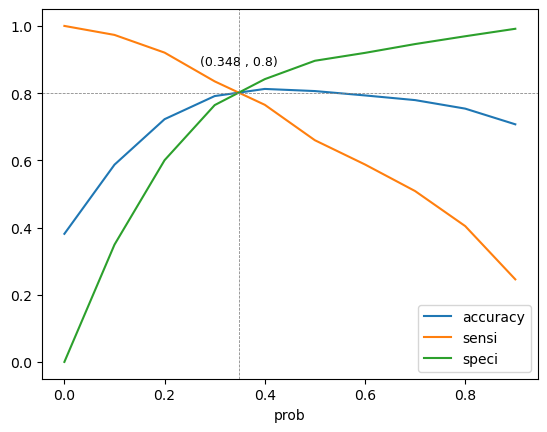

In [164]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

In [ ]:
# 0.348 seems to be our Optimal cutoff point for probability threshold.

In [165]:
#mapping again using optimal cutoff point
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.471885         1871                1
1          0        0.074210         6795                0
2          0        0.250326         3516                0
3          0        0.769245         8105                1
4          0        0.214012         3934                0

### 9.5 Calculating all metrics using confusion matrix for Train

In [166]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8059678416821274


In [167]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [193]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

print("Confusion Matrix")
print(confusion_matrix,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)



Confusion Matrix
[[3232  770]
 [ 485 1981]] 

True Negative                    :  3232
True Positive                    :  1981
False Negative                   :  485
False Positve                    :  770
Model Accuracy                   :  0.806
Model Sensitivity                :  0.8033
Model Specificity                :  0.8076
Model Precision                  :  0.7201
Model Recall                     :  0.8033
Model True Positive Rate (TPR)   :  0.8033
Model False Positive Rate (FPR)  :  0.1924


### 9.6 Precision and recall tradeoff

In [170]:
#Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])


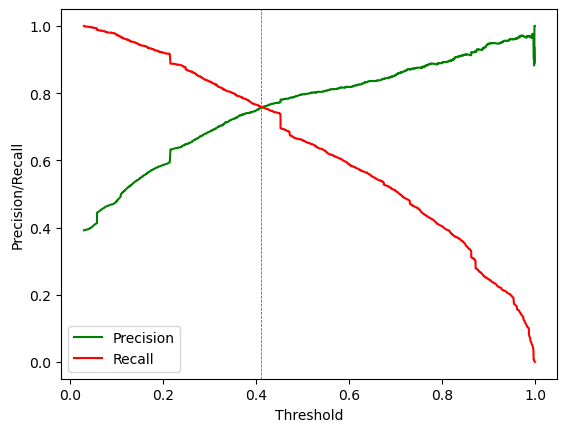

In [171]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

In [ ]:
#The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [172]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [173]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0        0.471885         1871                1   
1          0        0.074210         6795                0   
2          0        0.250326         3516                0   
3          0        0.769245         8105                1   
4          0        0.214012         3934                0   

   precision_recall_prediction  
0                            1  
1                            0  
2                            0  
3                            1  
4                            0

In [194]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])

print("Confusion Matrix")
print(confusion_matrix,"\n")


# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)


Confusion Matrix
[[3399  603]
 [ 592 1874]] 

True Negative                    :  3399
True Positive                    :  1874
False Negative                   :  592
False Positve                    :  603
Model Accuracy                   :  0.8152
Model Sensitivity                :  0.7599
Model Specificity                :  0.8493
Model Precision                  :  0.7566
Model Recall                     :  0.7599
Model True Positive Rate (TPR)   :  0.7599
Model False Positive Rate (FPR)  :  0.1507


### Adding Lead Score Feature to Training dataframe

In [176]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()


#A higher score would mean that the lead is hot, i.e. is most likely to convert
#Whereas a lower score would mean that the lead is cold and will mostly not get converted.

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.471885         1871                1          47
1          0        0.074210         6795                0           7
2          0        0.250326         3516                0          25
3          0        0.769245         8105                1          77
4          0        0.214012         3934                0          21

## Step 10: Making Predictions on Test Data

### 10.1 Scaling Test dataset

In [177]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               2772 non-null   float64
 1   Total Time Spent on Website               2772 non-null   int64  
 2   Page Views Per Visit                      2772 non-null   float64
 3   Free_copy                                 2772 non-null   int64  
 4   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 5   Lead Origin_Quick Add Form                2772 non-null   uint8  
 6   Lead Source_Facebook                      2772 non-null   uint8  
 7   Lead Source_Google                        2772 non-null   uint8  
 8   Lead Source_Olark Chat                    2772 non-null   uint8  
 9   Lead Source_Organic Search                2772 non-null   uint8  
 10  Lead Source_Others               

In [178]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.964504                                    0   
2376                    -0.885371                                    0   
7766                    -0.777416                                    0   
9199                    -0.885371                                    0   
4359                    -0.885371                                    0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4269                       0                      0   
2376                       0                      1   
7766                       0                      0   
9199                       1                      0   
4359                       0                      1   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
4269                             0                            0   
2376                             0                            0   
7766                             0                            0   
9199                             0                            0   
4359                             0                            0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
4269                           0                                      0   
2376                           0                                      0   
7766                           0                                      0   
9199                           0                                      1   
4359                           1                                      0   

      Last Activity_Others  Last Activity_SMS Sent  \
4269                     0                       1   
2376                     0                       1   
7766                     1                       0   
9199                     0                       0   
4359                     0                       0   

      Specialization_Hospitality Management  Specialization_Others  \
4269                                      0                      1   
2376                                      0                      1   
7766                                      0                      0   
9199                                      0                      1   
4359                                      0                      0   

      Current_occupation_Working Professional  
4269                                        0  
2376                                        0  
7766                                        1  
9199                                        0  
4359                                        0

### 10.2 Prediction on Test Dataset using final model

In [179]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 14)

In [181]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

In [182]:
# top 10 columns
y_test_pred[:10]

4269    0.697892
2376    0.862654
7766    0.886542
9199    0.057292
4359    0.871751
9186    0.503626
1631    0.419957
8963    0.154180
8007    0.081944
5324    0.298276
dtype: float64

In [183]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.697892
2376  0.862654
7766  0.886542
9199  0.057292
4359  0.871751

In [184]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [185]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.697892
1          1         2376  0.862654
2          1         7766  0.886542
3          0         9199  0.057292
4          1         4359  0.871751

In [186]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.697892
1         2376          1        0.862654
2         7766          1        0.886542
3         9199          0        0.057292
4         4359          1        0.871751

In [187]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.697892                1
1         2376          1        0.862654                1
2         7766          1        0.886542                1
3         9199          0        0.057292                0
4         4359          1        0.871751                1

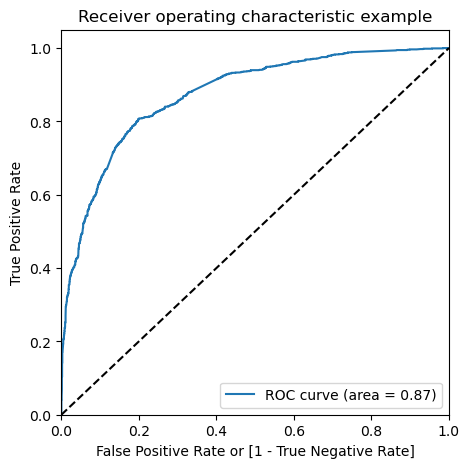

In [188]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

In [ ]:
#Area under ROC curve is 0.87 out of 1 which indicates a good predictive model


### 10.3 Test set Model Evaluation

In [195]:
#Calculating all metrics using confusion matrix for Test set
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])

print("Confusion Matrix")
print(confusion_matrix,"\n")
# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)


Confusion Matrix
[[1353  324]
 [ 220  875]] 

True Negative                    :  1353
True Positive                    :  875
False Negative                   :  220
False Positve                    :  324
Model Accuracy                   :  0.8038
Model Sensitivity                :  0.7991
Model Specificity                :  0.8068
Model Precision                  :  0.7298
Model Recall                     :  0.7991
Model True Positive Rate (TPR)   :  0.7991
Model False Positive Rate (FPR)  :  0.1932


In [ ]:
#The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

#For Test set
#Accuracy : 80.38%
#Sensitivity : 79.91% ≈ 80%
#Specificity : 80.68%
#These matrics are very close to train set, so out final model3 is performing with good consistency on both Train & Test set

In [190]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.425696
Lead Source_Reference                      2.946242
Current_occupation_Working Professional    2.659976
Last Activity_SMS Sent                     1.914872
Last Activity_Others                       1.117628
Total Time Spent on Website                1.051968
Lead Source_Olark Chat                     0.917136
Last Activity_Email Opened                 0.805559
Last Activity_Olark Chat Conversation     -0.694138
const                                     -0.903890
Last Activity_Email Bounced               -1.031518
Specialization_Hospitality Management     -1.071761
Specialization_Others                     -1.188329
Lead Origin_Landing Page Submission       -1.243095
dtype: float64

In [ ]:
#NOTE: A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

## Adding Lead Score Feature to Test dataframe 

In [196]:
# Adding Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.697892                1          70
1         2376          1        0.862654                1          86
2         7766          1        0.886542                1          89
3         9199          0        0.057292                0           6
4         4359          1        0.871751                1          87

## Conclusion

In [198]:
#Top 3 features that contributing positively to predicting hot leads in the model are:
   
 #   1.Lead Source_Welingak Website

 #   2.Lead Source_Reference

 #   3.Current_occupation_Working Professional

In [ ]:
Recommendations:
    
-Engage working professionals with tailored messaging.

-More budget/spend can be done on Welingak Website in terms of advertising, etc.

-Incentives/discounts for providing reference that convert to lead, encourage providing more references.

-Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too.
